In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-10-15 01:06:22--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-10-15 01:06:22 (31.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [5]:
data = pd.read_csv('moore.csv')

In [6]:
data = data.to_numpy()
data

array([[       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,      385000],
       [       1987,

In [7]:
X = data[:,0].reshape(-1, 1)
y = data[:,1]

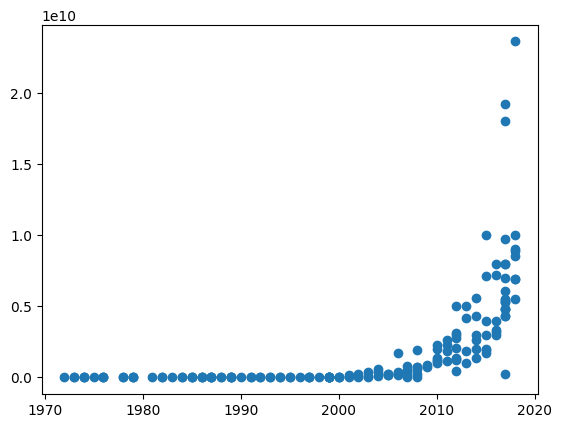

In [8]:
plt.scatter(X, y)

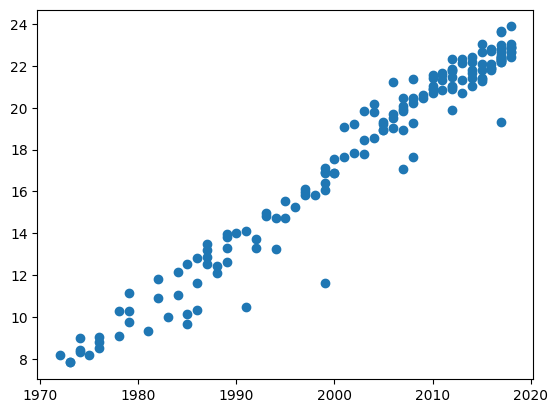

In [9]:
y = np.log(y)
plt.scatter(X, y)

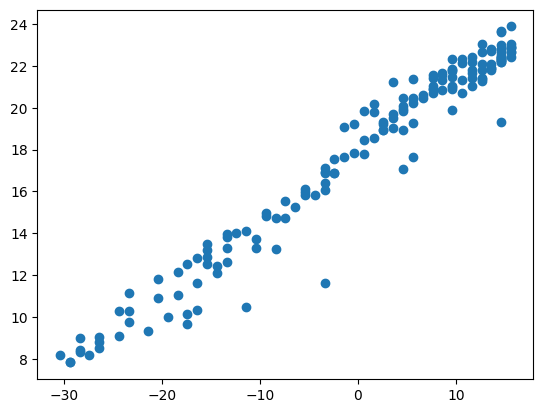

In [10]:
X_tr = (X - X.mean())
# scaler = MinMaxScaler()
# X_tr = scaler.fit_transform(X)
plt.scatter(X_tr, y)

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X_tr, y, random_state=42, test_size=0.2)

In [12]:
# y_train

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
             loss='mse')

In [14]:
def schedule(epochs, lr):
    if epochs >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
r = model.fit(X_tr, y, epochs=200, callbacks=[scheduler])#, validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 418.4034 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 318.4422 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 356.5088 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 196.1131 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 173.2250 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 183.4618 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 121.0041 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 64.9643 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 57.4095 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 49.1982 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

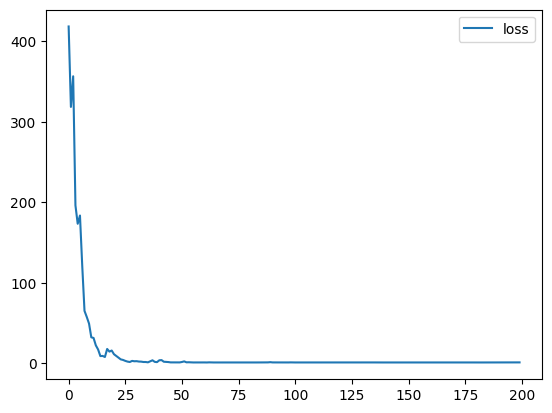

In [16]:
plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [17]:
model.layers[0].get_weights()

[array([[0.35954642]], dtype=float32), array([17.818964], dtype=float32)]

In [18]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
a

0.35954642